In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("/content/Jamboree_Admission.csv")

# **1. Problem Statement and Exploratory Data Analysis**

# Problem Statement:

Predict chance of admission based on features like GRE score,TOEFL score,university rating,SOP strength,etc

In [191]:
seed=2022
test_size=0.05 # five percentage

In [192]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# drop serial no. column as it is not useful

In [193]:
df=df.drop(columns=['Serial No.'])


In [194]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [195]:
df.shape

(500, 8)

# Check for data-type of each column

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [168]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No missing values

# Count plot of Research and University rating

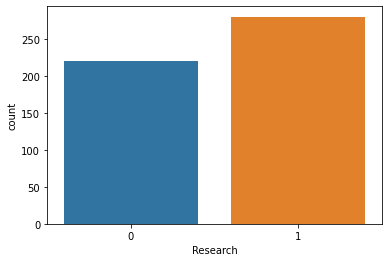

In [169]:
sns.countplot(x=df['Research'])

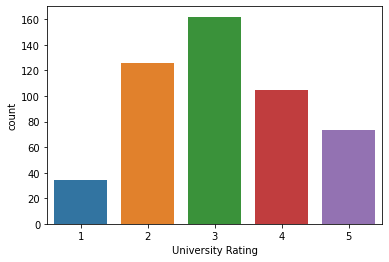

In [170]:
sns.countplot(x=df['University Rating'])

# simple *statistics*

In [171]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Minimum GRE score is 290 and maximum is 340. University rating column is a continous column,similarly SOP,LOR,CGPA,Research all are continous columns

# Outlier detection for columns: **GRE Score,TOEFL Score,SOP,LOR,CGPA**

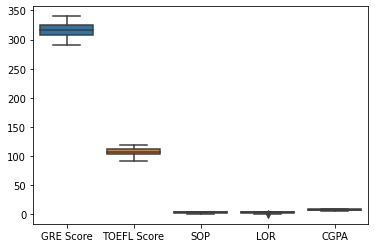

In [172]:
sns.boxplot(data=df[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

No outliers from the box plot

## Scatter plot between target variable(**Chance of Admit**) and GRE Score,TOEFLE Score,etc

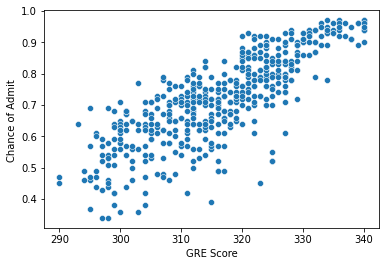

In [173]:
sns.scatterplot(x=df['GRE Score'],y=df['Chance of Admit '])

Linear relationship

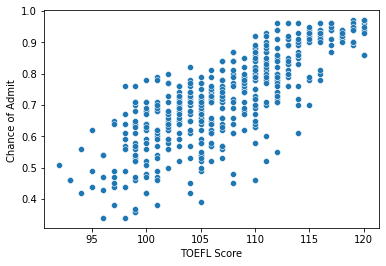

In [174]:
sns.scatterplot(x=df['TOEFL Score'],y=df['Chance of Admit '])

Here also linear relationship existed

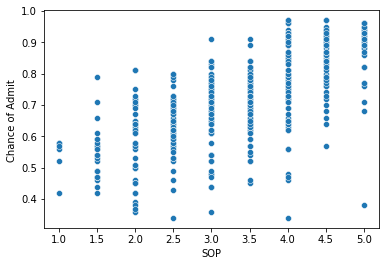

In [175]:
sns.scatterplot(x=df['SOP'],y=df['Chance of Admit '])

Hardly linear

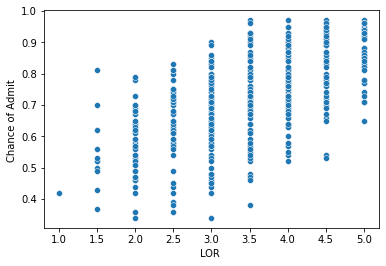

In [176]:
sns.scatterplot(x=df['LOR '],y=df['Chance of Admit '])

Hardly Linear

# **2. Data Preprocessing**

No missing value detected and no outliers detected according to box plot

# If any rows are duplicate drop it as these will not benefit model,on the contrary it will affect the performance of the model .There might be a case that the model performing well but that could be misleading

In [177]:
df=df.drop_duplicates()

In [178]:
df.shape

(500, 8)

no duplicates found in any rows.Also no duplicates column either confirmed by the simple statistics above

# divide the data train and test

In [179]:
df_train,df_test=train_test_split(df,random_state=seed,test_size=test_size)

In [180]:
df_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [181]:
df_train.shape

(475, 8)

In [182]:
df_test.shape

(25, 8)

# Feature Engeering:

Convert University Rating into a one-hot encoding as it is a categorical feature.Previously the data has been divide into train and test.The OneHotEncoder will be trained on train set and the trained model will be used to extract features from test set

In [183]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_train['University Rating'].values.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [184]:
ohe.transform(df_train['University Rating'].values.reshape(-1,1)).shape

(475, 5)

In [185]:
df_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Standarization of data

In [197]:
scaler=MinMaxScaler()

In [199]:
y_train=df_train['Chance of Admit '].values
X_train=df_train[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA','Research']].values
scaler.fit(X_train)

y_test=df_test['Chance of Admit '].values
X_test=df_test[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA','Research']].values
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

x_train_rating_transformed=ohe.transform(df_train['University Rating'].values.reshape(-1,1)).todense()
x_test_rating_transformed=ohe.transform(df_test['University Rating'].values.reshape(-1,1)).todense()
X_train=np.hstack((X_train,x_train_rating_transformed))

X_test=np.hstack((X_test,x_test_rating_transformed))

X_train.shape,X_test.shape

((475, 11), (25, 11))

# **3. Model building**

Build simple linear-regression,LASSO,and RIDGE regression

In [200]:
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
reg_simple=LinearRegression() # simple linear regression
reg_simple.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

In [201]:
reg_simple.coef_

array([ 9.98877614e-02,  7.75624055e-02, -9.39725232e-04,  7.15725870e-02,
        3.64204247e-01,  2.24922309e-02,  6.02020182e+12,  6.02020182e+12,
        6.02020182e+12,  6.02020182e+12,  6.02020182e+12])

In [202]:
coef_df_linear=pd.DataFrame(reg_simple.coef_,
                     index=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA','Research','University Rating1',
                            'University Rating2','University Rating3','University Rating4','University Rating5']
                     ).T
coef_df_linear['intercept']=reg_simple.intercept_

In [203]:
coef_df_linear

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,University Rating1,University Rating2,University Rating3,University Rating4,University Rating5,intercept
0,0.099888,0.077562,-0.00094,0.071573,0.364204,0.022492,6.020202e+12,6.020202e+12,6.020202e+12,6.020202e+12,6.020202e+12,-6.020202e+12


For one unit of increase in GRE score ,there is a increase of 0.001901 in chance of admission.Similarly other positive coeficients.For 1 unit of increase in university rating 1 there is a decrease of -0.003902 in chance of admission. 

In [204]:
reg_ridge=Ridge() # initialize with default parameters
reg_ridge.fit(X_train,y_train) # train the ridge regression model


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Ridge()

In [205]:
coef_df_ridge=pd.DataFrame(reg_ridge.coef_,
                     index=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA','Research','University Rating1',
                            'University Rating2','University Rating3','University Rating4','University Rating5']
                     ).T
coef_df_ridge['intercept']=reg_ridge.intercept_

In [206]:
coef_df_ridge

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,University Rating1,University Rating2,University Rating3,University Rating4,University Rating5,intercept
0,0.108674,0.09489,0.014165,0.067766,0.299125,0.024018,-0.00819,-0.01319,-0.003351,0.001148,0.023582,0.379974


For one unit of increase in GRE Score there is 0.001971 incremenet in the chance of admission

In [207]:
# Lasso regression
reg_lasso=Lasso() # initialize with default parameters
reg_lasso.fit(X_train,y_train) # train the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Lasso()

In [208]:
coef_df_lasso=pd.DataFrame(reg_lasso.coef_,
                     index=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA','Research','University Rating1',
                            'University Rating2','University Rating3','University Rating4','University Rating5']
                     ).T
coef_df_lasso['intercept']=reg_lasso.intercept_

In [209]:
coef_df_lasso

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,University Rating1,University Rating2,University Rating3,University Rating4,University Rating5,intercept
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.722084


Woh,using Lasso most of the features are useless,the importance of these features are zero.Only GRE Score suffice to predict the chance of admission according to Lasso regression.

# **4.Testing the assumptions of the linear regression model**

# Multi-colinearity check

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [211]:
dff=df.iloc[:,:-1] # extract every column except the target column(chance of admit)

In [212]:
  
# calculating VIF for each feature
vif_data= [variance_inflation_factor(dff.values, i)
                          for i in range(len(dff.columns))]
vif_data=pd.Series(vif_data,index=dff.columns)
vif_data

Serial No.              4.159745
GRE Score            1328.233222
TOEFL Score          1230.783122
University Rating      20.934147
SOP                    36.155544
LOR                    31.231834
CGPA                  952.907558
Research                2.869689
dtype: float64

**GRE Score** has the heighest VIF score therefore droped it 

In [213]:
# again calculate 
dff=dff.iloc[:,1:]
# calculating VIF for each feature
vif_data= [variance_inflation_factor(dff.values, i)
                          for i in range(len(dff.columns))]
vif_data=pd.Series(vif_data,index=dff.columns)
vif_data

GRE Score            1308.061089
TOEFL Score          1215.951898
University Rating      20.933361
SOP                    35.265006
LOR                    30.911476
CGPA                  950.817985
Research                2.869493
dtype: float64

**CGPA** column has the heighest VIF score,therefor droped it

In [214]:
dff.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [215]:
# again calculate 
dff=dff.loc[:,['TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'Research']]
# calculating VIF for each feature
vif_data= [variance_inflation_factor(dff.values, i)
                          for i in range(len(dff.columns))]
vif_data=pd.Series(vif_data,index=dff.columns)
vif_data

TOEFL Score          22.035055
University Rating    19.747053
SOP                  33.273087
LOR                  29.531351
Research              2.849489
dtype: float64

**SOP** column has the heighest VIF score,therefore droped it

In [216]:
# again calculate 
dff=dff.loc[:,['TOEFL Score', 'University Rating', 'LOR ', 'Research']]
# calculating VIF for each feature
vif_data= [variance_inflation_factor(dff.values, i)
                          for i in range(len(dff.columns))]
vif_data=pd.Series(vif_data,index=dff.columns)
vif_data

TOEFL Score          19.844499
University Rating    14.952839
LOR                  25.700130
Research              2.824467
dtype: float64

**LOR** has the heighest VIF score

In [217]:
# again calculate 
dff=dff.loc[:,['TOEFL Score', 'University Rating', 'Research']]
# calculating VIF for each feature
vif_data= [variance_inflation_factor(dff.values, i)
                          for i in range(len(dff.columns))]
vif_data=pd.Series(vif_data,index=dff.columns)
vif_data

TOEFL Score          10.258756
University Rating    11.840110
Research              2.780788
dtype: float64

**University Rating** has the heighest VIF score,therefore droped it

In [218]:
# again calculate 
dff=dff.loc[:,['TOEFL Score', 'Research']]
# calculating VIF for each feature
vif_data= [variance_inflation_factor(dff.values, i)
                          for i in range(len(dff.columns))]
vif_data=pd.Series(vif_data,index=dff.columns)
vif_data

TOEFL Score    2.407952
Research       2.407952
dtype: float64

Now we have got VIF score less than 5

# The mean of residuals is nearly zero:

**H0:** Mean is zero

**H1:** Otherwise 

# We will use residuals of the training set

In [219]:
from statsmodels.stats.weightstats import ztest
# Residuals of Linear regression
res_linear=y_train-reg_simple.predict(X_train)

mu=0

# one sample ztest
ztest(res_linear,value=0) # value is the mean under null hypothesis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(0.08221190128207219, 0.9344782096291914)

**P-value** is almost equal to 1.With 5% level of significance the mean is not zero i.e null hypothesis is not true

In [220]:
from statsmodels.stats.weightstats import ztest
# Residuals of Lasso regression
res_lasso=y_train-reg_lasso.predict(X_train)

mu=0

# one sample ztest
ztest(res_lasso,value=0) # value is the mean under null hypothesis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(1.985169667015014e-14, 0.9999999999999841)

Here also the **p-value** is almost equal to 1.Hence null hypothesis is not true with 5%=0.05 level of significance i.e mean is not zero

In [221]:
from statsmodels.stats.weightstats import ztest
# Residuals of Rideg regression
res_ridge=y_train-reg_ridge.predict(X_train)

mu=0

# one sample ztest
ztest(res_ridge,value=0) # value is the mean under null hypothesis


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(9.09184152678694e-14, 0.9999999999999275)

Here also the same result

Therefore all the regression algorithms(Linear Regreesion,Lasso, and Ridge) failed to satisfy that the mean of the residual is zero

# Linearity of variables

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


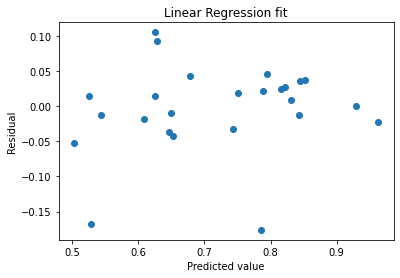

In [222]:
# Residuals of Linear regression
pred_linear=reg_simple.predict(X_test) # predicition on the test set
res_linear=y_test-pred_linear
plt.scatter(pred_linear,res_linear)
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Linear Regression fit')
plt.show()

Not a very strong pattern visible in the residual plot,therefore it could be consider linearity of variables

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


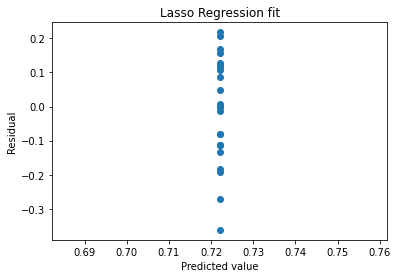

In [223]:
# Residuals of Lasso regression
pred_lasso=reg_lasso.predict(X_test) # predicition on the test set
res_lasso=y_test-pred_lasso
plt.scatter(pred_lasso,res_lasso)
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Lasso Regression fit')
plt.show()

It is clearly visible that there is linear pattern in the residual.Therefore for Lasso regression the variables are not linear

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


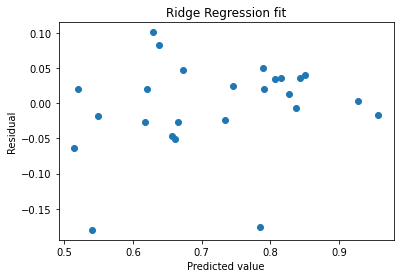

In [224]:
# Residuals of Ridge regression
pred_ridge=reg_ridge.predict(X_test) # predicition on the test set
res_ridge=y_test-pred_ridge
plt.scatter(pred_ridge,res_ridge)
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Ridge Regression fit')
plt.show()

Linear regression and Linear regression fits are almost giving same patttern in the residual pattern.Here variables could be considered linear as there is not much significant pattern in the residual plot

# Test for Homoscedasticity

For the **linear** and **ridge** regressions there is not significant pattern in the residual plot whereas in the **Lasso** regression the residual is increasing as the predicted value is increasing.Therefore **Lasso** suffer from the problem of **Homoscedasticity**

# Normality of residuals

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


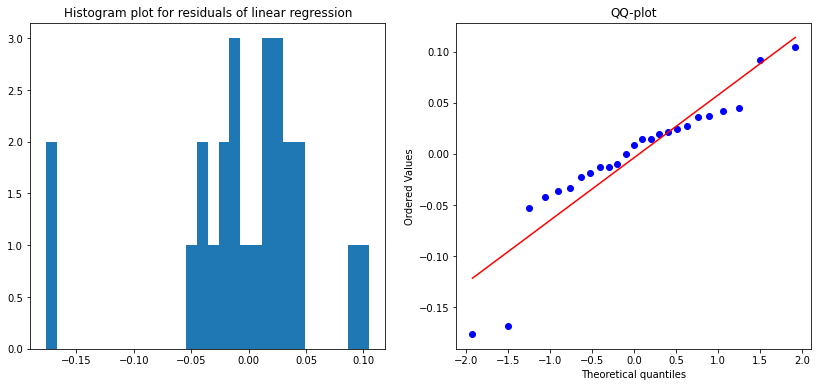

In [225]:
# plot the histogram of the residuals
# Residuals of Linear regression
import scipy.stats as stats
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
ax=ax.flatten()
pred_linear=reg_simple.predict(X_test) # predicition on the test set
res_linear=y_test-pred_linear
ax[0].hist(res_linear,bins=30)
ax[0].set_title('Histogram plot for residuals of linear regression')

stats.probplot(res_linear, dist="norm", plot=ax[1])
ax[1].set_title("QQ-plot")
plt.show()

Clearly the histogram is not bell shaped.Also the QQ-plot is plot is not strictly on straight line

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


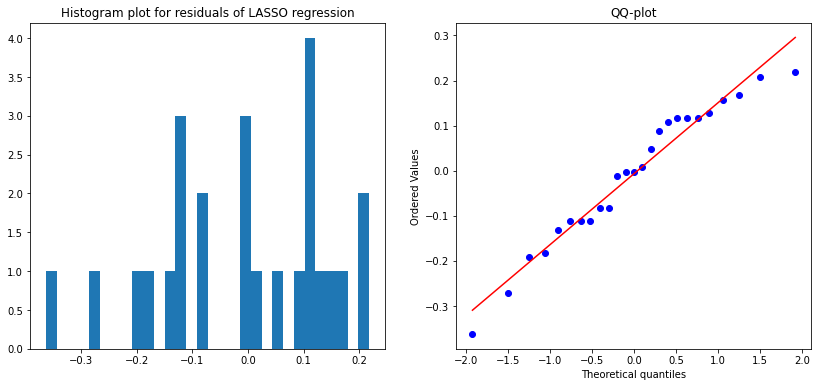

In [226]:
# plot the histogram of the residuals
# Residuals of Lasso regression
import scipy.stats as stats
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
ax=ax.flatten()
pred_lasso=reg_lasso.predict(X_test) # predicition on the test set
res_lasso=y_test-pred_lasso
ax[0].hist(res_lasso,bins=30)
ax[0].set_title('Histogram plot for residuals of LASSO regression')

stats.probplot(res_lasso, dist="norm", plot=ax[1])
ax[1].set_title("QQ-plot")
plt.show()

This is not bell-shaped either.From QQ-plot the residuals could be considered normal.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


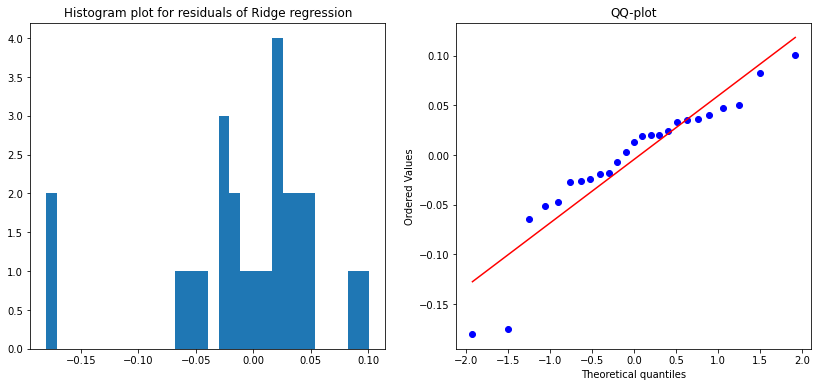

In [227]:
# plot the histogram of the residuals
# Residuals of Ridge regression
import scipy.stats as stats
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
ax=ax.flatten()
pred_ridge=reg_ridge.predict(X_test) # predicition on the test set
res_ridge=y_test-pred_ridge
ax[0].hist(res_ridge,bins=30)
ax[0].set_title('Histogram plot for residuals of Ridge regression')

stats.probplot(res_ridge, dist="norm", plot=ax[1])
ax[1].set_title("QQ-plot")
plt.show()

This is alos not bell-shaped either.The QQ-plot is not on the straight line.There the residuals do not follow normal distribution

# **5. Model performance evaluation** 

In [228]:
def mae(data,y_true,model):
  # Calculating Mean Absolute Error
  # prediction
  y_pred=model.predict(data)
  residuals=y_true-y_pred
  error=np.mean(np.absolute(residuals))
  return error

def rmse(data,y_true,model):
  # Calculate Root Mean Squared Error
  # prediction
  y_pred=model.predict(data)
  residuals=y_true-y_pred
  error=np.mean(residuals**2)**(1/2)
  return error


def r2(data,y_true,model):
  # calculate coefficient of determination(aka R2 score)
  # prediction
  y_pred=model.predict(data)
  residuals=y_true-y_pred
  SSres=np.sum(residuals**2)
  SStot=np.sum((y_true-np.mean(y_true))**2)

  score=1-(SSres/SStot)
  return score


def adj_r2(data,y_true,model):
  # calculate Adjusted R2 score
  r2_score=r2(data,y_true,model) # calculate r2 score
  N=len(data) # number of data points
  p=data.shape[1] # number of independent variables
  score=1-((1-r2_score)*(N-1)/(N-p-1))
  return score 

In [229]:
models=['Linear','Lasso','Ridge']

# calculate test MAE for all model
test_mae=[mae(X_test,y_test,reg_simple),mae(X_test,y_test,reg_lasso),mae(X_test,y_test,reg_ridge)]

# now calculate MAE on train
train_mae=[mae(X_train,y_train,reg_simple),mae(X_train,y_train,reg_lasso),mae(X_train,y_train,reg_ridge)]

# Calculate RMSE on test data
test_rmse=[rmse(X_test,y_test,reg_simple),rmse(X_test,y_test,reg_lasso),rmse(X_test,y_test,reg_ridge)]

# on train data
train_rmse=[rmse(X_train,y_train,reg_simple),rmse(X_train,y_train,reg_lasso),rmse(X_train,y_train,reg_ridge)]

# Caculate R2 score on test data
test_r2=[r2(X_test,y_test,reg_simple),r2(X_test,y_test,reg_lasso),r2(X_test,y_test,reg_ridge)]

# on train data
train_r2=[r2(X_train,y_train,reg_simple),r2(X_train,y_train,reg_lasso),r2(X_train,y_train,reg_ridge)]

# Calculate Adjusted R squared score on test data
test_adj_r2=[adj_r2(X_test,y_test,reg_simple),adj_r2(X_test,y_test,reg_lasso),adj_r2(X_test,y_test,reg_ridge)]

# on train data 
train_adj_r2=[adj_r2(X_train,y_train,reg_simple),adj_r2(X_train,y_train,reg_lasso),adj_r2(X_train,y_train,reg_ridge)]


df_metrics=pd.DataFrame({'Model':models,'MAE:Test':test_mae,'MAE:Train':train_mae,
                         'RMSE:Test':test_rmse,'RMSE:Train':train_rmse,
                        'R2:Test':test_r2,'R2:Train':train_r2,
                        'Adj R2:Test':test_adj_r2,'Adj R2:Train':train_adj_r2})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [230]:
df_metrics

,Model,MAE:Test,MAE:Train,RMSE:Test,RMSE:Train,R2:Test,R2:Train,Adj R2:Test,Adj R2:Train
0,Linear,0.043003,0.042652,0.062094,0.059215,0.829824,0.822299,0.685828,0.818078
1,Lasso,0.125683,0.113297,0.150680,0.140472,-0.002092,0.000000,-0.850016,-0.023758
2,Ridge,0.046596,0.042500,0.064433,0.059356,0.816763,0.821453,0.661717,0.817211


The overall best model is **linear regression model** becasue of low error as well as great R2 and Adjusted R2 scores.

# **6.Actionable Insights & Recommendations**

1. Predictor variables like **LOR** , **CGPA**,**Research**,and **University Rating5** have large feature importance than other predictor variables.

2. There are only 500 data-points ,dividing this much data into train and test.The train size becomes even smaller.Machine Learning model needs data .Data is the oil .More oil more flexibility.

3. According to R2 and Adjusted R2 scores ,the model is overfitting,to mitigate the overfitting we need regularization but still using regularization ,the models Lasso and Ridge are also overfitting.

4. If regularization is not enough then we need more data.